<a href="https://colab.research.google.com/github/oldairjsilva/IGTI/blob/main/desafio_final_igti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df_compras_clientes = pd.read_csv('/content/df_compras_clientes.csv', sep=';')

In [3]:
df_compras_clientes.isnull().sum()

Unnamed: 0            0
cod_cliente           0
cod_produto           0
qtd_produto           0
valor_unitario        0
valor_total_compra    0
nome_produto          0
cod_classe_produto    0
classe_produto        0
valor                 0
sexo                  0
idade                 0
qtd_filhos            0
estado_civil          0
cod_estado            0
hipertenso            0
diabetes              0
nome_estado           0
sgl_estado            0
dtype: int64

In [4]:
df_idades_hist = df_compras_clientes.query('hipertenso == 1 and classe_produto == "Bebidas"')['idade']

AxesSubplot(0.125,0.125;0.775x0.755)


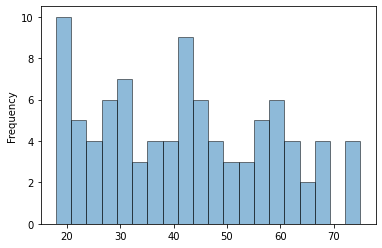

In [5]:
histogram = df_idades_hist.plot.hist(bins = 20, alpha = 0.5, edgecolor='k')
print(histogram)
plt.show()

In [10]:
df_compras_clientes

,Unnamed: 0,cod_cliente,cod_produto,qtd_produto,valor_unitario,valor_total_compra,nome_produto,cod_classe_produto,classe_produto,valor,sexo,idade,qtd_filhos,estado_civil,cod_estado,hipertenso,diabetes,nome_estado,sgl_estado
0,0,1,1011.0,3,5.99,17.97,Lustra móveis,1,Produtos de Limpeza,5.99,1,26,2,3,13,0,1,Minas Gerais,MG
1,1,65,1011.0,3,5.99,17.97,Lustra móveis,1,Produtos de Limpeza,5.99,1,50,0,0,9,1,1,Goiás,GO
2,2,126,1011.0,1,5.99,5.99,Lustra móveis,1,Produtos de Limpeza,5.99,0,35,2,0,16,1,1,Paraná,PR
3,3,310,1011.0,3,5.99,17.97,Lustra móveis,1,Produtos de Limpeza,5.99,1,51,2,2,22,1,1,Rondônia,RO
4,4,313,1011.0,4,5.99,23.96,Lustra móveis,1,Produtos de Limpeza,5.99,0,38,0,2,24,0,1,Santa Catarina,SC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985,2985,2377,1015.0,3,12.00,36.00,Saco de lixo 30l,1,Produtos de Limpeza,12.00,1,64,1,1,12,1,1,Mato Grosso do Sul,MS
2986,2986,2497,1015.0,1,12.00,12.00,Saco de lixo 30l,1,Produtos de Limpeza,12.00,1,70,0,3,24,0,0,Santa Catarina,SC
2987,2987,2709,1015.0,4,12.00,48.00,Saco de lixo 30l,1,Produtos de Limpeza,12.00,0,69,3,0,9,1,0,Goiás,GO
2988,2988,2785,1015.0,1,12.00,12.00,Saco de lixo 30l,1,Produtos de Limpeza,12.00,1,30,1,0,19,1,0,Rio de Janeiro,RJ


In [21]:
df_compras_clientes.query('diabetes == 1 and classe_produto == "Hortifruti"').groupby('sexo')['sexo'].count()

sexo
0    209
1    202
Name: sexo, dtype: int64

In [30]:
df_compras_clientes.query('nome_estado == "São Paulo"').groupby('classe_produto')['valor_total_compra'].mean()

classe_produto
Alimentação            17.406000
Bebidas                12.106250
Carnes e Frios         82.678947
Hortifruti              9.455714
Produtos de Limpeza    22.088696
Name: valor_total_compra, dtype: float64

In [32]:
df_compras_clientes_wcss = df_compras_clientes[['idade','valor_total_compra']]

In [34]:
df_compras_clientes_wcss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2990 entries, 0 to 2989
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   idade               2990 non-null   int64  
 1   valor_total_compra  2990 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 46.8 KB


In [35]:
from sklearn.cluster import KMeans

In [36]:
def calcular_wcss(df_compras_clientes_wcss):
  wcss = []
  for k in range(1,11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X = df_compras_clientes_wcss)
    wcss.append(kmeans.inertia_)
  return wcss

In [37]:
wcss_clientes = calcular_wcss(df_compras_clientes_wcss)

In [38]:
type(wcss_clientes)

list

In [39]:
# Visualizando os dados obtidos do WCSS
for i in range(len(wcss_clientes)):
  print(f'O cluster {i} possui valor de WCSS de {wcss_clientes[i]}')

O cluster 0 possui valor de WCSS de 3594146.388905852
O cluster 1 possui valor de WCSS de 1665877.0056578144
O cluster 2 possui valor de WCSS de 1077627.1131622999
O cluster 3 possui valor de WCSS de 725775.9704285846
O cluster 4 possui valor de WCSS de 533118.5850935784
O cluster 5 possui valor de WCSS de 442113.3444509555
O cluster 6 possui valor de WCSS de 379370.8242917437
O cluster 7 possui valor de WCSS de 331519.6596485032
O cluster 8 possui valor de WCSS de 301102.1415421462
O cluster 9 possui valor de WCSS de 272132.97167998145


In [ ]:
import plotly.express as px # Criação de gráficos dinâmicos
import plotly.offline as py
import plotly.graph_objects as go # Para criação e concatenização de graficos

In [ ]:
grafico_wcss = px.line(x = range(1,11), 
                       y = wcss_clientes
                       )
fig = go.Figure(grafico_wcss)
fig.update_layout(title = 'Calculando o WCSS', 
                  xaxis_title = 'Número de clusters',
                  yaxis_title = 'Valor do wcss',
                  template = 'plotly_white'
                  )
fig.show()

In [ ]:
kmeans_clientes = KMeans(n_clusters=4, random_state=0)
df_compras_clientes['cluster'] = kmeans_clientes.fit_predict(df_compras_clientes_wcss)

In [ ]:
df_compras_clientes

,Unnamed: 0,cod_cliente,cod_produto,qtd_produto,valor_unitario,valor_total_compra,nome_produto,cod_classe_produto,classe_produto,valor,sexo,idade,qtd_filhos,estado_civil,cod_estado,hipertenso,diabetes,nome_estado,sgl_estado,cluster
0,0,1,1011.0,3,5.99,17.97,Lustra móveis,1,Produtos de Limpeza,5.99,1,26,2,3,13,0,1,Minas Gerais,MG,0
1,1,65,1011.0,3,5.99,17.97,Lustra móveis,1,Produtos de Limpeza,5.99,1,50,0,0,9,1,1,Goiás,GO,2
2,2,126,1011.0,1,5.99,5.99,Lustra móveis,1,Produtos de Limpeza,5.99,0,35,2,0,16,1,1,Paraná,PR,0
3,3,310,1011.0,3,5.99,17.97,Lustra móveis,1,Produtos de Limpeza,5.99,1,51,2,2,22,1,1,Rondônia,RO,2
4,4,313,1011.0,4,5.99,23.96,Lustra móveis,1,Produtos de Limpeza,5.99,0,38,0,2,24,0,1,Santa Catarina,SC,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985,2985,2377,1015.0,3,12.00,36.00,Saco de lixo 30l,1,Produtos de Limpeza,12.00,1,64,1,1,12,1,1,Mato Grosso do Sul,MS,2
2986,2986,2497,1015.0,1,12.00,12.00,Saco de lixo 30l,1,Produtos de Limpeza,12.00,1,70,0,3,24,0,0,Santa Catarina,SC,2
2987,2987,2709,1015.0,4,12.00,48.00,Saco de lixo 30l,1,Produtos de Limpeza,12.00,0,69,3,0,9,1,0,Goiás,GO,2
2988,2988,2785,1015.0,1,12.00,12.00,Saco de lixo 30l,1,Produtos de Limpeza,12.00,1,30,1,0,19,1,0,Rio de Janeiro,RJ,0


Calcula os centroides de cada cluster

In [ ]:
centroides_clusters = kmeans_clientes.cluster_centers_
centroides_clusters

array([[ 32.09468318,  14.33136926],
       [ 46.90954774,  86.20175879],
       [ 60.87889775,  13.33338651],
       [ 46.33333333, 204.14589744]])

In [ ]:
grafico = px.scatter(x = df_compras_clientes['idade'],
                     y = df_compras_clientes['valor_total_compra'],
                     color = df_compras_clientes['cluster'])
grafico_centroide = px.scatter(x = centroides_clusters[:,0], y = centroides_clusters[:,1], size = [7,7,7,7])
grafico_final = go.Figure(data = grafico.data + grafico_centroide.data)
grafico_final.show()

In [ ]:
import plotly.express as px # Criação de gráficos dinâmicos
import plotly.offline as py
import plotly.graph_objects as go # Para criação e concatenização de graficos

In [ ]:
grafico = px.scatter(x = df_compras_clientes['idade'],
                     y = df_compras_clientes['valor_total_compra'],
                     color = df_compras_clientes['cluster'])
fig = go.Figure(grafico)

fig.update_layout(title = 'Análise de Clusters',
                  xaxis_title = 'idade',
                  yaxis_title = 'valor_total_compra',
                  )
fig.show()

In [ ]:
df_compras_clientes.query(' hipertenso == 1 & estado_civil == 0').groupby('cluster')['hipertenso'].count()

cluster
0    160
1     26
2    162
3      6
Name: hipertenso, dtype: int64

In [ ]:
df_compras_clientes.query('diabetes == 1').groupby('cluster')['diabetes'].count()

cluster
0    713
1    102
2    689
3     15
Name: diabetes, dtype: int64

## Algoritmo apriori

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Market_Basket_Optimisation.csv', header=None)
dataset = df.values
print (dataset)

[['shrimp' 'almonds' 'avocado' ... 'frozen smoothie' 'spinach'
  'olive oil']
 ['burgers' 'meatballs' 'eggs' ... nan nan nan]
 ['chutney' nan nan ... nan nan nan]
 ...
 ['chicken' nan nan ... nan nan nan]
 ['escalope' 'green tea' nan ... nan nan nan]
 ['eggs' 'frozen smoothie' 'yogurt cake' ... nan nan nan]]


In [ ]:
# passo 1: definir o threshhold 

sThreshold = 0.2
numberOfTransactions = len(dataset)

In [ ]:
# passo 2: definir uma tabela que expressa a frequência de cada item

# Primeiro criamos uma lista de todos os produtos disponíveis
listOfItems = []

for i in range(len(dataset)):
        for j in range(len(dataset[i])):
                if(dataset[i][j] not in listOfItems):
                    listOfItems.append(dataset[i][j])

In [ ]:
# agora criamos contamos qual a frequência de cada item nas transações

singleItemFrequency = {}

for item in listOfItems:
    frequency = 0
    for i in range(len(dataset)):
        if(item in dataset[i]):
            frequency += 1
    singleItemFrequency[item] = frequency
    
print(singleItemFrequency)

{'shrimp': 536, 'almonds': 153, 'avocado': 250, 'vegetables mix': 193, 'green grapes': 68, 'whole weat flour': 70, 'yams': 86, 'cottage cheese': 239, 'energy drink': 200, 'tomato juice': 228, 'low fat yogurt': 574, 'green tea': 991, 'honey': 356, 'salad': 37, 'mineral water': 1788, 'salmon': 319, 'antioxydant juice': 67, 'frozen smoothie': 475, 'spinach': 53, 'olive oil': 494, 'burgers': 654, 'meatballs': 157, 'eggs': 1348, nan: 0, 'chutney': 31, 'turkey': 469, 'milk': 972, 'energy bar': 203, 'whole wheat rice': 439, 'whole wheat pasta': 221, 'french fries': 1282, 'soup': 379, 'light cream': 117, 'shallot': 58, 'frozen vegetables': 715, 'spaghetti': 1306, 'pet food': 49, 'cookies': 603, 'cooking oil': 383, 'champagne': 351, 'chocolate': 1229, 'chicken': 450, 'oil': 173, 'fresh tuna': 167, 'tomatoes': 513, 'black tea': 107, 'extra dark chocolate': 90, 'protein bar': 139, 'red wine': 211, 'pasta': 118, 'pepper': 199, 'shampoo': 37, 'rice': 141, 'sparkling water': 47, 'ham': 199, 'body sp

In [ ]:
# Aplicando a exclusão baseado no threshold

supportThreshold = len(dataset) * sThreshold
print("Support Threshold number: ", supportThreshold)

Support Threshold number:  1500.2


In [ ]:
afterCleaning = {}


for key, value in singleItemFrequency.items():
    if(value > supportThreshold):
        afterCleaning[key]= value
        
print (afterCleaning)

{'mineral water': 1788}


In [ ]:
# Agora fazendo o mesmo procedimento com grupos de 2 produtos

def is_in_array(item1, item2, tocheck):
    for i in range(len(tocheck)):
        if item1 in tocheck[i] and item2 in tocheck[i]:
            return True
    return False

itemFrequency = []

for item1 in listOfItems:
    for item2 in listOfItems:
        if(item1 == item2):
            continue
        frequency = 0
        isIn = is_in_array(item1, item2, itemFrequency)
        if (isIn):
            continue
        for i in range(len(dataset)):
            if(item1 and item2 in dataset[i]):
                frequency += 1
        itemFrequency.append([item1,item2,frequency])
    
print(itemFrequency)

[['shrimp', 'almonds', 153], ['shrimp', 'avocado', 250], ['shrimp', 'vegetables mix', 193], ['shrimp', 'green grapes', 68], ['shrimp', 'whole weat flour', 70], ['shrimp', 'yams', 86], ['shrimp', 'cottage cheese', 239], ['shrimp', 'energy drink', 200], ['shrimp', 'tomato juice', 228], ['shrimp', 'low fat yogurt', 574], ['shrimp', 'green tea', 991], ['shrimp', 'honey', 356], ['shrimp', 'salad', 37], ['shrimp', 'mineral water', 1788], ['shrimp', 'salmon', 319], ['shrimp', 'antioxydant juice', 67], ['shrimp', 'frozen smoothie', 475], ['shrimp', 'spinach', 53], ['shrimp', 'olive oil', 494], ['shrimp', 'burgers', 654], ['shrimp', 'meatballs', 157], ['shrimp', 'eggs', 1348], ['shrimp', nan, 0], ['shrimp', 'chutney', 31], ['shrimp', 'turkey', 469], ['shrimp', 'milk', 972], ['shrimp', 'energy bar', 203], ['shrimp', 'whole wheat rice', 439], ['shrimp', 'whole wheat pasta', 221], ['shrimp', 'french fries', 1282], ['shrimp', 'soup', 379], ['shrimp', 'light cream', 117], ['shrimp', 'shallot', 58], 

In [ ]:
twoItemsAfterCleaning = []


for i in range(len(itemFrequency)):
    if(itemFrequency[i][2] > supportThreshold):
        twoItemsAfterCleaning.append(itemFrequency[i])
print (twoItemsAfterCleaning)

[['shrimp', 'green tea', 991], ['shrimp', 'mineral water', 1788], ['shrimp', 'eggs', 1348], ['shrimp', 'milk', 972], ['shrimp', 'french fries', 1282], ['shrimp', 'spaghetti', 1306], ['shrimp', 'chocolate', 1229], ['almonds', 'green tea', 991], ['almonds', 'mineral water', 1788], ['almonds', 'eggs', 1348], ['almonds', 'milk', 972], ['almonds', 'french fries', 1282], ['almonds', 'spaghetti', 1306], ['almonds', 'chocolate', 1229], ['avocado', 'green tea', 991], ['avocado', 'mineral water', 1788], ['avocado', 'eggs', 1348], ['avocado', 'milk', 972], ['avocado', 'french fries', 1282], ['avocado', 'spaghetti', 1306], ['avocado', 'chocolate', 1229], ['vegetables mix', 'green tea', 991], ['vegetables mix', 'mineral water', 1788], ['vegetables mix', 'eggs', 1348], ['vegetables mix', 'milk', 972], ['vegetables mix', 'french fries', 1282], ['vegetables mix', 'spaghetti', 1306], ['vegetables mix', 'chocolate', 1229], ['green grapes', 'green tea', 991], ['green grapes', 'mineral water', 1788], ['gr

In [ ]:
for item in twoItemsAfterCleaning:
    value = singleItemFrequency[item[0]]
    if value <= 0:
        value = 1
    confiance = (item[2]/numberOfTransactions)/value
    print ("confiança de quem comprou ", item[0], " em comprar ", item[1], " = ", confiance)

confiança de quem comprou  shrimp  em comprar  green tea  =  0.00024648454832887953
confiança de quem comprou  shrimp  em comprar  mineral water  =  0.00044471682382647487
confiança de quem comprou  shrimp  em comprar  eggs  =  0.0003352786792606757
confiança de quem comprou  shrimp  em comprar  milk  =  0.00024175881026808365
confiança de quem comprou  shrimp  em comprar  french fries  =  0.0003188629575758058
confiança de quem comprou  shrimp  em comprar  spaghetti  =  0.00032483231091575847
confiança de quem comprou  shrimp  em comprar  chocolate  =  0.00030568063561674366
confiança de quem comprou  almonds  em comprar  green tea  =  0.0008635014242109766
confiança de quem comprou  almonds  em comprar  mineral water  =  0.0015579622063463432
confiança de quem comprou  almonds  em comprar  eggs  =  0.001174571059370733
confiança de quem comprou  almonds  em comprar  milk  =  0.0008469458974097571
confiança de quem comprou  almonds  em comprar  french fries  =  0.0011170623873243916
c

In [ ]:
%pip install pandas
%pip install numpy
%pip install plotly
%pip install networkx
%pip install matplotlib
#https://hands-on.cloud/implementation-of-apriori-algorithm-using-python/

In [ ]:
# importing module
import pandas as pd

# dataset
data = pd.read_csv("/content/mercado.csv", sep=';')

# printing the shape of the dataset
data.shape

(7501, 21)

In [ ]:
# printing the heading
data.head()

,Id,product_1,product_2,product_3,product_4,product_5,product_6,product_7,product_8,product_9,...,product_11,product_12,product_13,product_14,product_15,product_16,product_17,product_18,product_19,product_20
0,0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,...,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# importing module
import numpy as np

# Gather All Items of Each Transactions into Numpy Array
transaction = []
for i in range(0, data.shape[0]):
    for j in range(0, data.shape[1]):
        transaction.append(data.values[i,j])

# converting to numpy array
transaction = np.array(transaction)

#  Transform Them a Pandas DataFrame
df = pd.DataFrame(transaction, columns=["items"]) 

# Put 1 to Each Item For Making Countable Table, to be able to perform Group By
df["incident_count"] = 1 

#  Delete NaN Items from Dataset
indexNames = df[df['items'] == "nan" ].index
df.drop(indexNames , inplace=True)

# Making a New Appropriate Pandas DataFrame for Visualizations  
df_table = df.groupby("items").sum().sort_values("incident_count", ascending=False).reset_index()

#  Initial Visualizations
df_table.head(10).style.background_gradient(cmap='Greens')

,items,incident_count
0,mineral water,1788
1,eggs,1348
2,spaghetti,1306
3,french fries,1282
4,chocolate,1230
5,green tea,991
6,milk,972
7,ground beef,737
8,frozen vegetables,715
9,pancakes,713


In [ ]:
# importing required module
import plotly.express as px

# to have a same origin
df_table["all"] = "all" 

# creating tree map using plotly
fig = px.treemap(df_table.head(30), path=['all', "items"], values='incident_count',
                  color=df_table["incident_count"].head(30), hover_data=['items'],
                  color_continuous_scale='Greens',
                )
# ploting the treemap
fig.show()

In [ ]:
# importing the required module
from mlxtend.preprocessing import TransactionEncoder

# initializing the transactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transaction).transform(transaction)
dataset = pd.DataFrame(te_ary, columns=te.columns_)

# dataset after encoded
dataset

TypeError: ignored

In [ ]:
# select top 50 items
first50 = df_table["items"].head(50).values 



In [ ]:
# Extract Top50
dataset = dataset.loc[:,first50] 


KeyError: ignored

In [ ]:
# importing the required module
from mlxtend.frequent_patterns import apriori,association_rules


# Extracting the most frequest itemsets via Mlxtend.
# The length column has been added to increase ease of filtering.
frequent_itemsets = apriori(dataset, min_support=0.1, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# printing the frequent itemset
frequent_itemsets

,support,itemsets,length
0,0.916693,(2),1
1,0.155560,(6),1
2,0.884153,(15),1
3,0.849033,"(2, 15)",2


In [ ]:
# printing the frequntly items 
frequent_itemsets[(frequent_itemsets['support'] >= 0.05) ]

,support,itemsets,length
0,0.916693,(2),1
1,0.155560,(6),1
2,0.884153,(15),1
3,0.849033,"(2, 15)",2


In [ ]:
#  We set our metric as "Lift" to define whether antecedents & consequents are dependent our not
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.2)
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
rules.sort_values("lift",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
0,(2),(15),0.916693,0.884153,0.849033,0.926191,1.047546,0.038536,1.569552,1,1
1,(15),(2),0.884153,0.916693,0.849033,0.960278,1.047546,0.038536,2.097263,1,1


In [ ]:
# Sort values based on confidence
rules.sort_values("confidence",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
1,(15),(2),0.884153,0.916693,0.849033,0.960278,1.047546,0.038536,2.097263,1,1
0,(2),(15),0.916693,0.884153,0.849033,0.926191,1.047546,0.038536,1.569552,1,1


In [ ]:
#https://www.datarlabs.com/post/market-basket-optimisation-using-association-rule-mining
#https://www.kaggle.com/code/prateekagrawal1405/market-basket-optimisation-using-association-rules/notebook
# DEPENDENCIES
import pandas as pd 
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [ ]:
# df.read_csv('filepath',headers=None)
df=pd.read_csv('/content/Market_Basket_Optimisation.csv',header=None)

In [ ]:
# Let's have a look at the first few rows in our dataframe.
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# replace all the NaN values with ‘’ and use inplace=True to commit the changes permanent into the dataframe
df.fillna('',axis=1,inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,,,,,,,,,,,,,,,,,
2,chutney,,,,,,,,,,,,,,,,,,,
3,turkey,avocado,,,,,,,,,,,,,,,,,,
4,mineral water,milk,energy bar,whole wheat rice,green tea,,,,,,,,,,,,,,,


In [ ]:
# convert the dataframe into a list of lists where each inner list represents a transaction.

df_list = df.to_numpy().tolist()
df_list
dataset = list()
for i in range(len(df_list)) :
  item = list()
  for j in df_list[i] :
    if pd.notna(j):
      item.append(j)
  dataset.append(item)

In [ ]:
# Create an instance of our TransactionEncoder class 
te = TransactionEncoder()
# Fit and transform our dataset which is a list of lists into an array of True and False.
te_array = te.fit(dataset).transform(dataset)
te_array

array([[False, False,  True, ...,  True, False, False],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       ...,
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False,  True, False]])

In [ ]:
# Convert this into a dataframe for better visualisation and for applying association rules onto the dataframe.

final_df = pd.DataFrame(te_array,columns=te.columns_)
# remove the first column as it does not contain any information
final_df.drop(columns=[''],axis=1,inplace=True)
final_df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
frequent_itemsets_ap = apriori(final_df, min_support= 0.05 , use_colnames=True)

In [ ]:
frequent_itemsets_ap

,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.059992,(chicken)
3,0.163845,(chocolate)
4,0.080389,(cookies)
5,0.051060,(cooking oil)
6,0.179709,(eggs)
7,0.079323,(escalope)
8,0.170911,(french fries)
9,0.063325,(frozen smoothie)


In [ ]:
# import association rules class to find association rules among the items/group of items which have a support greater than the min support.
from mlxtend.frequent_patterns import association_rules

# We have used the metric as confidence and min_threshold to filter out the association rules based on these parameters.
rules_ap = association_rules(frequent_itemsets_ap, metric="confidence", min_threshold=0.2)

In [ ]:
# Convert the rules obtained into a dataframe for better visualisation
result = pd.DataFrame(rules_ap)
result.sort_values(by='lift',inplace=True,ascending=False)
result

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
5,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008
1,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
0,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
2,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815
3,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158
